# TP2. Fonctions de une et deux variables. Discrétisation

In [ ]:
# Import des modules python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Discrétisation de la dérivée d'une fonction

### Question 1


Avec la méthode de votre choix, écrivez une fonction qui calcule les différences finies d'une fonction dérivable $f$ échantillonnées sur des valeurs régulièrement espacées $x_0<x_1<... <x_n$ et dont le pas vaut $h$.

In [ ]:
# definition de fonction 1 -x^2 +x^3
def f(u):
    return 1- u**2 + u**3 

def der_f(u):
    return -2*u + 3*u**2

# donner de valeurs pour x (30 valeurs dans l'intervale (-0.2,1))
x = np.linspace(-0.2,1,15)

# definition de fonction de differences finis
def diff_finies(u,fonction):
    """
    x : set de points
    f : fonction
    returns : tableau de la derive 
    """
    
    # h ->difference entre deux points concecutives de x
    h = u[1]-u[0]
    
    return np.diff(fonction(u))/h


# tracer les differences finies
plt.figure()
plt.title("Finite differences for 1 -x^2 + x^3")
plt.xlabel("x")
plt.plot(x[:-1],diff_finies(x,f),'-*')
plt.show()

### Question 2

Appliquez votre fonction précédente pour diverses fonctions dérivables usuelles dont vous connaissez la dérivée:

1. Affichez sur un même graphique la dérivée exacte et la dérivée discrétisée.

2. Sur un autre graphique, montrez l'erreur entre les deux.

3. Mettez en évidence que l'erreur diminue de façon proportionnelle au pas du maillage.


In [1]:

# We know that the derivative of x^3 is 3x^2

def cube(u):
    return u**3

def der_cube(u):
    return 3*u**2


n = np.arange(15,35,5)
x = np.linspace(-2,2,15)

    
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(x[:-1],diff_finis(x,cube),'*')
ax1.plot(x[::],der_cube(x))
ax1.set_title("dérivée exacte et la dérivée discrétisée n=15")
ax2.plot(x[:-1],np.abs(der_cube(x[:-1])-diff_finies(x,f)))
ax2.set_title("Erreur entre les deux")
ax2.set_xlabel("Nombre des éleménts")
fig.tight_layout(pad=5.0)
plt.show()

NameError: name 'np' is not defined

In [ ]:
h_list=[0.0001,0.001,0.01,0.1]

plt.figure()
for h in h_list:
    x=np.arange(-np.pi,np.pi,h)
    plt.plot(x[:-1],np.log(np.abs(der_cube(x[:-1])-diff_finies(x,f))))

plt.legend(h_list)
plt.show()

## Fonctions de deux variables

### Question 3

Générez un échantillonage régulier du rectangle $[-2,2] \times [-1,1]$. 
Vous utiliserez la fonction meshgrid de numpy.

In [ ]:
help(np.meshgrid) # checkout documentation

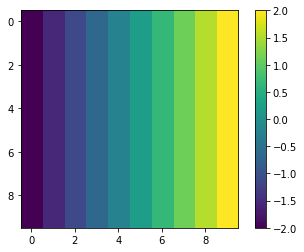

In [36]:
# define linear spaces with the same number of elements
x = np.linspace(-2,2,10)
y = np.linspace(-1,1,10)

# get meshgrid
xx , yy = np.meshgrid(x, y, sparse=False, indexing='xy')

# plot x axis as image
plt.imshow(xx)
plt.colorbar()

### Question 4

Affichez la fonction de deux variables $(x,y) \mapsto x^2+2y^2$. Pour cela vous regardez la documentation de la fonction plot_surface et utiliserez nécessairement la première instruction donnée ci-dessous qui permet d'afficher et de manipuler une fenêtre 3D dans un jupyter notebook.

<IPython.core.display.Javascript object>


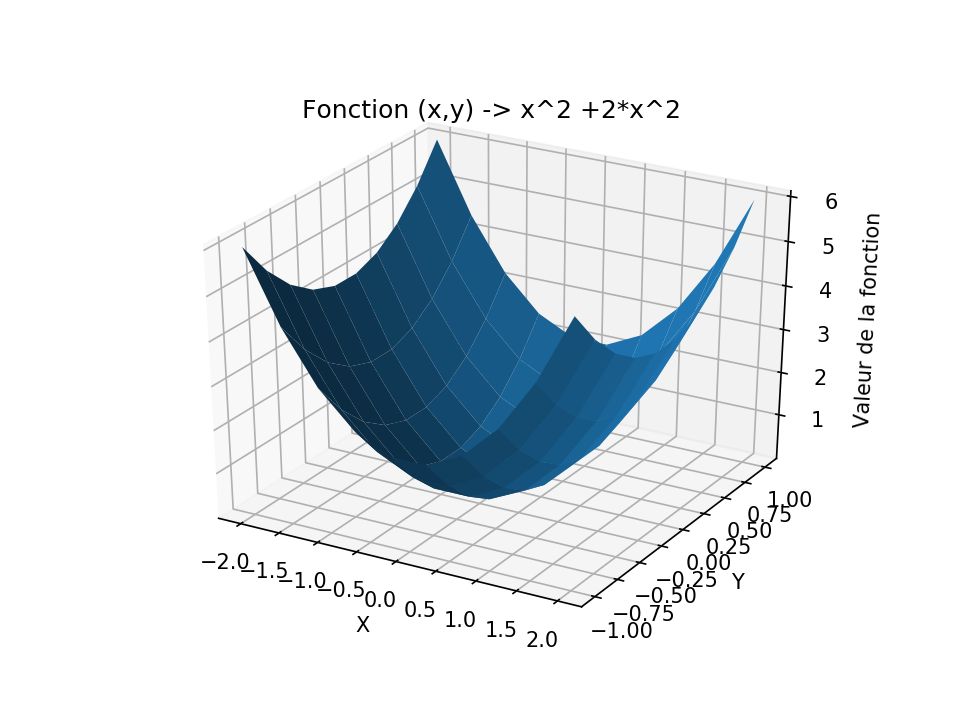

In [37]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D #import 3d projection

#define 2 variable function
def f2v(x,y):
    return x**2+2*y**2

# plot objects
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# third axis - function values
zs = np.array(f2v(np.ravel(xx), np.ravel(yy)))
Z = zs.reshape(xx.shape)

# plot surface
ax.plot_surface(xx, yy, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Valeur de la fonction')
ax.set_title("Fonction (x,y) -> x^2 +2*x^2")

plt.show()



## Opérateurs différentiels

### Question 5

Représentez sur une même image la fonction précédente, vue comme un niveau de gris ou une couleur, et les vecteurs gradient, obtenus de manière analytique. Vous prendrez en compte:
1. La documentation de la fonction imshow pour avoir des axes qui comportent la bonne unité. 
2. La documentation de la fonction quiver pour afficher un champ de vecteur.

<IPython.core.display.Javascript object>


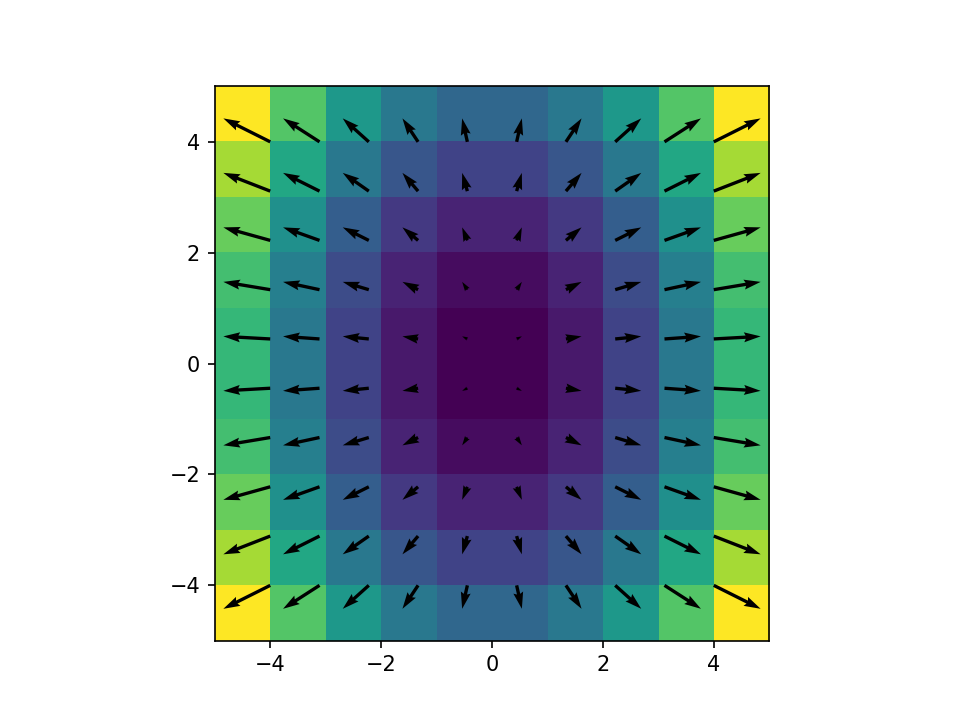

<IPython.core.display.Javascript object>


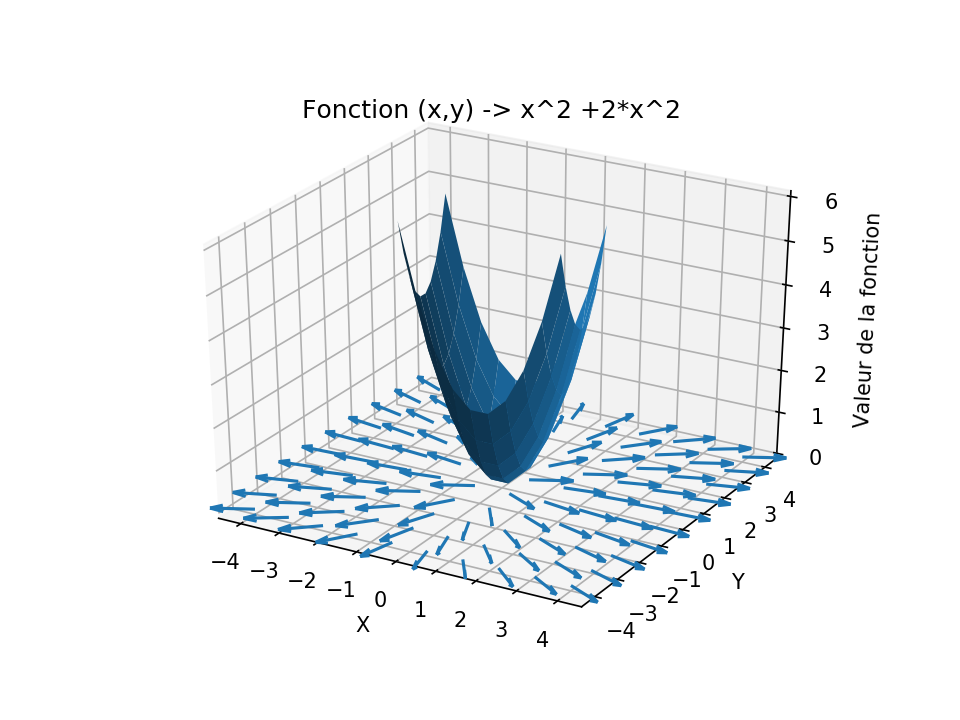

In [38]:
# define partial derivatives
"""
def der_partiel_x(u):
    return 2*u
def der_pariel_y(u):
    return 4*u

gradient = (der_partiel_x(x),der_pariel_y(y))#/(np.abs(der_partiel_x(x))+np.abs(der_pariel_y(y)))
                                             # normalization \
"""

# define gradient
def grad(x,y):
    return 2*x,4*y


w = np.zeros_like(Z)

grad_x, grad_y = grad(xx,yy)

plt.figure()
plt.imshow(Z,extent=[-5,5,-5,5]) #use extende with number of elements in grid
plt.quiver(grad_x,grad_y,xx,yy)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, Z)
#q = ax.quiver(xx,yy,0,gradient[0],gradient[1],0,normalize=True)
q = ax.quiver(grad_x,grad_y,0,xx,yy,0,normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Valeur de la fonction')
ax.set_title("Fonction (x,y) -> x^2 +2*x^2")


### Question 6

Reprenez la question précédente en calculant cette fois le gradient par la méthode de discrétisation de votre choix (fonction diff ou fonctions de filtrage).

Visualisez l'erreur de discrétisation, par exemple en affichant en chaque pixel la norme de la différence entre le gradient exact et le gradient approché.

In [ ]:
 def diff_finis(x,f):
    """
    x : set de points
    f : fonction
    returns : tableau de la derive 
    """
    
    # h ->differnce entre deux points concecutives de x
    h = x[1] - x[0]
    
    return np.diff(f(x))/h


def diff_finis_2d(x,y,f):
    h1 = x[1] - x[0]
    h2 = y[1] - y[0]
    
    grad = (diff(f(x,y))

### Question 7 (qui anticipe le cours suivant)

En un point $(x_0,y_0)$ et pour une fonction $f$ quelconque, représentez le plan d'équation $f(x_0,y_0)+(x-x_0,y-y_0)\cdot \nabla f (x_0,y_0) =0$. Qu'observez vous ?
